In [7]:
import bezier
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
import pandas as pd
from pandas.api.types import CategoricalDtype
import ppscore as pps
from scipy import stats
from scipy.interpolate import CubicSpline


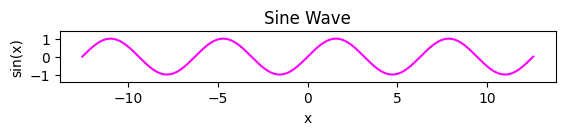

In [8]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 10000)
y = np.sin(x)

plt.plot(x, y, color='magenta')

plt.ylim(min(y) - 0.4, max(y) + 0.4)

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Wave')

plt.gca().set_aspect('equal')

plt.show()

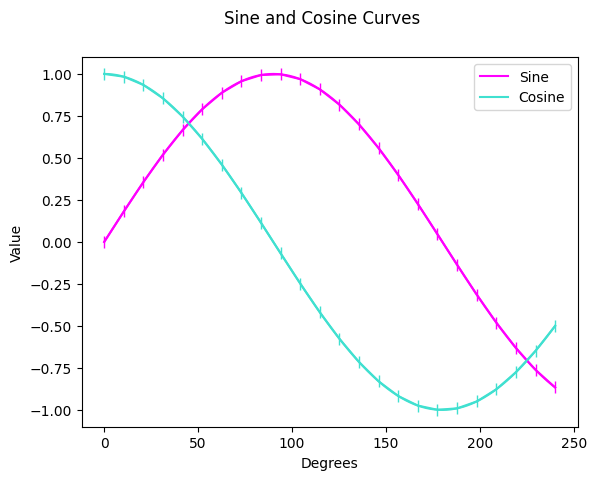

In [9]:
x = np.linspace(0, 240, 1000)
x_rad = np.radians(x)
y_sin = np.sin(x_rad)
y_cos = np.cos(x_rad)

plt.plot(x, y_sin, color='magenta', linestyle='-', label='Sine')
plt.plot(x, y_cos, color='turquoise', linestyle='-', label='Cosine')

x_markers = np.linspace(0, 240, 24)
x_rad_markers = np.radians(x_markers)
y_sin_markers = np.sin(x_rad_markers)
y_cos_markers = np.cos(x_rad_markers)

plt.plot(x_markers, y_sin_markers, color='magenta', marker='|', markersize=9)
plt.plot(x_markers, y_cos_markers, color='turquoise', marker='|', markersize=9)

plt.legend()
plt.suptitle('Sine and Cosine Curves')
plt.xlabel('Degrees')
plt.ylabel('Value')

plt.show()


In [10]:
x_y_pd = pd.read_csv("../data/1.dat.csv", sep=',', skipinitialspace=True)

x = x_y_pd['x']
y = x_y_pd['y']

#plt.plot(x, y, color='magenta', marker='.')

#plt.legend()
#plt.suptitle('1.dat.csv')
#plt.xlabel('x')
#plt.ylabel('y')

#plt.show()

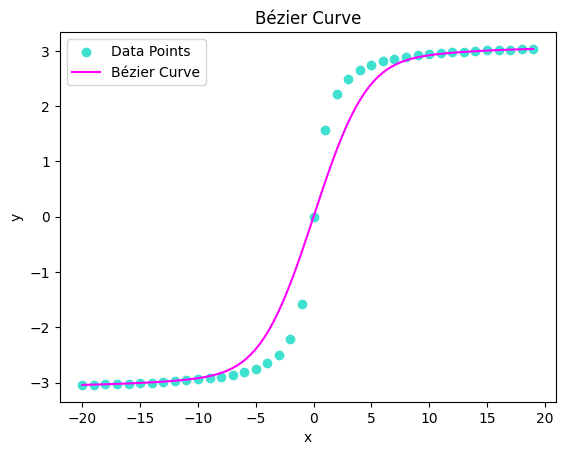

In [11]:
assert x.shape == y.shape

nodes = np.asfortranarray([x, y])

bezier_curve = bezier.Curve(nodes, degree=len(x)-1)

num_points = 100  # Adjust the number of points as desired
points = bezier_curve.evaluate_multi(np.linspace(0, 1, num_points))

plt.scatter(x, y, color='turquoise', label='Data Points')
plt.plot(points[0], points[1], linestyle='-', color='magenta', label='Bézier Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bézier Curve')
plt.show()

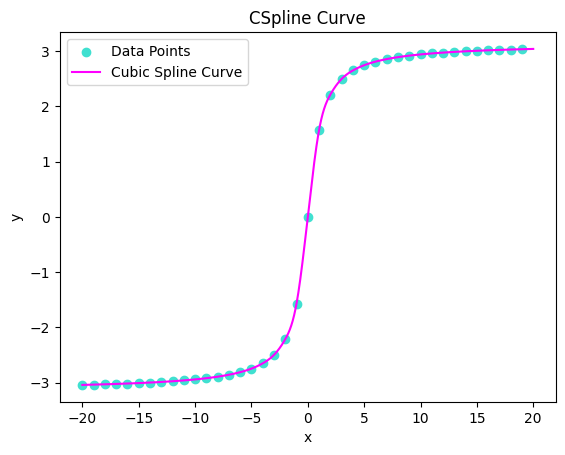

In [12]:
assert x.shape == y.shape

cspline_curve = CubicSpline(x, y)

cspline_curve_axis = np.linspace(-20, 20, 10000)
cspline_curve_result = cspline_curve(cspline_curve_axis)

plt.scatter(x, y, color='turquoise', label='Data Points')

plt.plot(cspline_curve_axis, cspline_curve_result, color='magenta', label='Cubic Spline Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title('CSpline Curve')
plt.legend()

plt.show()